In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


# 새 섹션

In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/dataset.zip"

In [ ]:
pwd

'/content'

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/detectron2'

/content/drive/MyDrive/Colab Notebooks/detectron2


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/detectron2'

In [ ]:
!pip install fvcore
!pip install omegaconf
!pip install importlib

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[array([0.333, 0.   , 0.5  ], dtype=float32), array([0.   , 0.   , 0.167], dtype=float32), array([0.667, 0.   , 0.5  ], dtype=float32), array([0.857, 0.857, 0.857], dtype=float32), array([0.667, 0.   , 0.5  ], dtype=float32), array([0.333, 0.667, 0.5  ], dtype=float32), array([1.   , 0.333, 0.5  ], dtype=float32), array([0.6, 0.6, 0.6], dtype=float32), array([0.333, 0.667, 0.   ], dtype=float32), array([1.   , 0.333, 1.   ], dtype=float32), array([0.857, 0.857, 0.857], dtype=float32), array([0.929, 0.694, 0.125], dtype=float32), array([0.   , 0.333, 1.   ], dtype=float32), array([1.   , 0.667, 0.5  ], dtype=float32), array([0.667, 0.   , 0.   ], dtype=float32), array([0. , 0.5, 0. ], dtype=float32), array([0.   , 0.   , 0.667], dtype=float32), array([0. , 0.5, 0. ], dtype=float32), array([0.667, 0.667, 0.   ], dtype=float32), array([0.667, 0.667, 0.   ], dtype=float32), array([0. , 0. , 0.5], dtype=float32), array([0.667, 0.   , 0.   ], dtype=float32), array([0.667, 0.   , 1.   ], dtyp

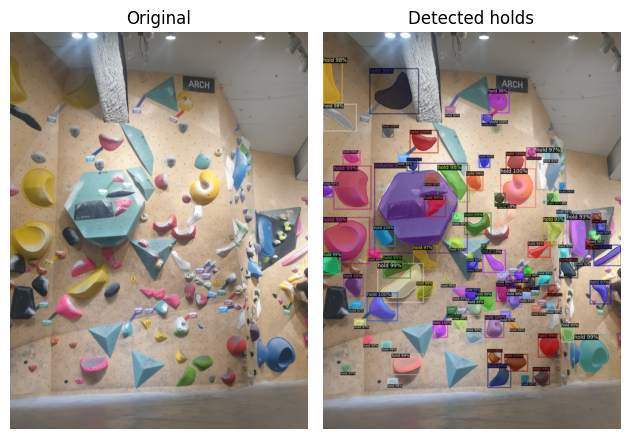

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import os

MODEL_DIRECTORY = "kaggle/dataset/model/"
SAMPLE_IMAGE = "kaggle/dataset/sm/974.jpg"


# Get config and weigths for model
cfg = get_cfg()
cfg.merge_from_file(os.path.join(MODEL_DIRECTORY, "experiment_config.yml"))
cfg.MODEL.WEIGHTS = os.path.join(MODEL_DIRECTORY, "model_final.pth")
cfg.MODEL.DEVICE='cpu'

# Set metadata, in this case only the class names for plotting
MetadataCatalog.get("meta").thing_classes = ["hold", "volume"]
metadata = MetadataCatalog.get("meta")

predictor = DefaultPredictor(cfg)

img = cv2.imread(SAMPLE_IMAGE)
outputs = predictor(img)
v = Visualizer(
    img[:, :, ::-1],
    metadata=metadata
)

out_predictions, predicted_color = v.draw_instance_predictions(outputs["instances"].to("cpu"))
img_holds = out_predictions.get_image()
img_colors = predicted_color
print(img_colors)
# display the results
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img[:, :, ::-1])
ax1.axis('off')
ax1.set_title('Original')

ax2.imshow(img_holds)
ax2.axis('off')
ax2.set_title('Detected holds')

fig.tight_layout()
plt.show()




In [ ]:

# get coordinates
# tensor(좌측 상단 x 좌표, 좌측 상단 y 좌표, 우측 하단 x좌표, 우측 하단 y 좌표)
# print(outputs["instances"].pred_boxes)
box_info = []
for box in outputs["instances"].pred_boxes:
  top_left_x = box[0].numpy()
  top_left_y = box[1].numpy()
  bottom_right_x = box[0].numpy()
  bottom_right_y = box[1].numpy()
  center_x = (top_left_x + bottom_right_x) / 2
  center_y = (top_left_y + bottom_right_y) / 2
  height = top_left_y - bottom_right_y
  width = bottom_right_x - top_left_x
  box_info.append([center_x, center_y, height, width])

category_info = []

# hold 인지 volume 인지?
for num in outputs["instances"].pred_classes:
  category = "volume" if num.numpy() else "hold"
  category_info.append(category)

In [ ]:
print(outputs["instances"].get_fields())

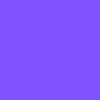

In [ ]:
import numpy
from google.colab.patches import cv2_imshow

colors = []

# 예측된 객체의 클래스와 색상 정보 추출
for color in predicted_color:
    rgb_color = (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))  # RGB 값으로 변환
    colors.append(rgb_color)

# for i in range(len(box_info)):
#   if()

for i in range(len(category_info)):
  if(category_info[i] == 'volume'):
    # 이미지 생성
    color_image = numpy.zeros((100, 100, 3), dtype=numpy.uint8)  # 100x100 크기의 빈 이미지 생성
    color_image[:] = colors[i]

    # 이미지를 화면에 표시
    cv2_imshow(color_image)


# for rgb_color in colors:
#   # 이미지 생성
#   color_image = numpy.zeros((100, 100, 3), dtype=numpy.uint8)  # 100x100 크기의 빈 이미지 생성
#   color_image[:] = rgb_color

#   # 이미지를 화면에 표시
#   cv2_imshow(color_image)